# Descriptive Analytics for Numerical Columns

Load the dataset

In [10]:
import pandas as pd
data_df = pd.read_csv("D:\excelr Assignments\sales_data_with_discounts.csv")
print(df.head())


         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [11]:
type(data_df)

pandas.core.frame.DataFrame

In [12]:
data_df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [16]:
numerical_columns = ['Total Sales Value', 'Discount Amount'] 

In [17]:
statistics = df[numerical_columns].describe().loc[['mean', '50%', 'std']].append(df[numerical_columns].mode().iloc[0])
print("Basic Statistical Measures for Numerical Columns:")
print(statistics)


Basic Statistical Measures for Numerical Columns:
      Total Sales Value  Discount Amount
mean       33812.835556      3346.499424
50%         5700.000000       988.933733
std        50535.074173      4509.902963
0          24300.000000        69.177942


C:\Users\G.S.AZARUDDIN\AppData\Local\Temp\ipykernel_27568\1898617612.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics = df[numerical_columns].describe().loc[['mean', '50%', 'std']].append(df[numerical_columns].mode().iloc[0])


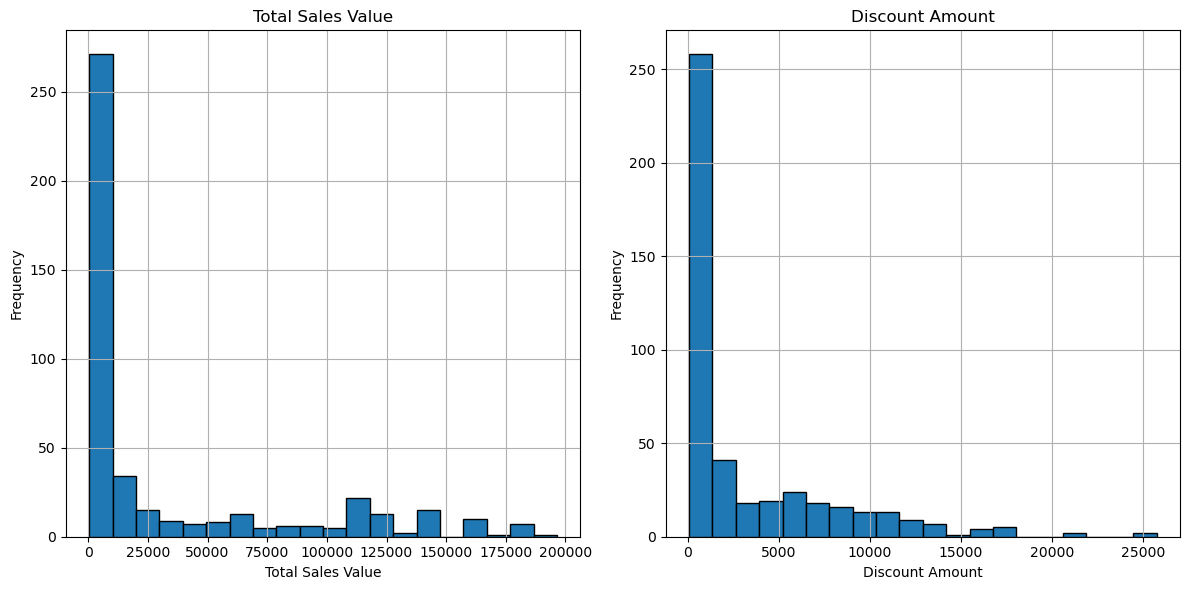

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    df[col].hist(bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


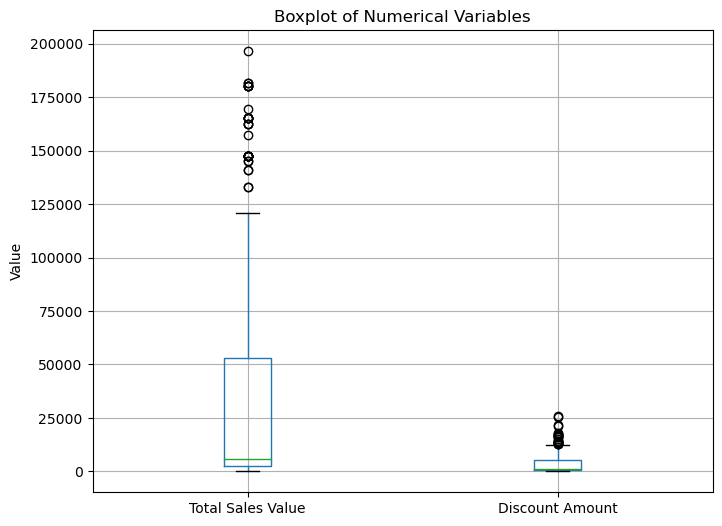

In [19]:
plt.figure(figsize=(8, 6))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Variables')
plt.ylabel('Value')
plt.show()


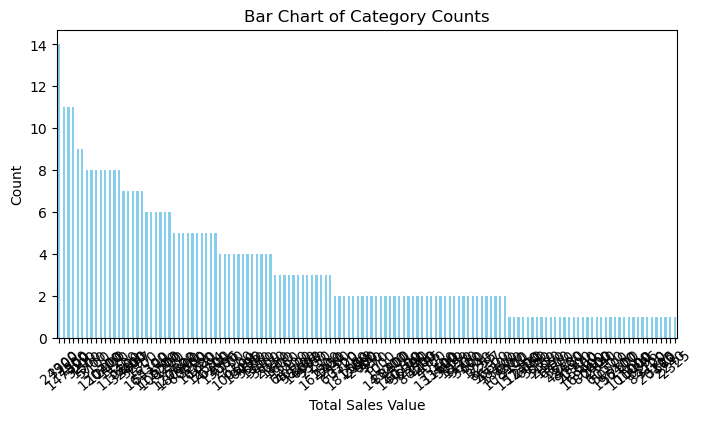

In [43]:
categorical_columns = ['Total Sales Value'] 
plt.figure(figsize=(8, 4))
df['Total Sales Value'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Counts')
plt.xlabel('Total Sales Value')
plt.ylabel('Count')
plt.xticks(rotation=400)
plt.show()


In [55]:
for Total Sales Value in numerical_columns:
    mean = df[Total Sales Value].mean()
    std_dev = df[Total Sales Value].std()
    df[Total Sales Value + '_standardized'] = (df[Total Sales Value] - mean) / std_dev
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['Total Sales Value'].hist(bins=20, edgecolor='black')
plt.title('Before Standardization (Total Sales Value)')
plt.xlabel('Total Sales Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['Total Sales Value_standardized'].hist(bins=20, edgecolor='black')
plt.title('After Standardization (Sales)')
plt.xlabel('Total Sales Value (Standardized)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



SyntaxError: invalid syntax (3725670085.py, line 1)

In [45]:
# Apply one-hot encoding to categorical columns
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display a portion of the transformed dataset
print("Portion of Transformed Dataset with Dummy Variables:")
print(df_dummies.head())


Portion of Transformed Dataset with Dummy Variables:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Discount Rate (%)  ...  Total Sales Value_140700  \
0      12100          11.654820  ...                         0   
1      10100          11.560498  ...                         0   
2      16100           9.456886  ...                         0   
3      20100           6.935385  ...                         0   
4       8100          17.995663  ...                         0   

   Total Sales Value_145200  Total Sales Value_147300  \
0                         0                         0 